In [2]:
import pandas as pd
import ast

rules = pd.read_csv("../association_rules.csv")

def parse_frozenset(x):
    # Example: "frozenset({'symptom_A', 'treatment_B'})"
    if isinstance(x, str):
        if x.startswith("frozenset"):
            # remove 'frozenset(' and trailing ')'
            x = x.replace("frozenset", "")
            x = x.strip("()")
        return ast.literal_eval(x)
    return x

rules["antecedents"] = rules["antecedents"].apply(parse_frozenset)
rules["consequents"] = rules["consequents"].apply(parse_frozenset)

rules.head(10)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,method
0,{treatment:cardiac_med},{symptom:heart_disease},0.054012,0.054012,0.054012,1.0,18.514493,1.0,0.051094,inf,1.0,1.0,1.0,1.0,apriori
1,{symptom:heart_disease},{treatment:cardiac_med},0.054012,0.054012,0.054012,1.0,18.514493,1.0,0.051094,inf,1.0,1.0,1.0,1.0,apriori
2,"{treatment:lifestyle_change, symptom:hypertens...","{treatment:antihypertensive, symptom:obese}",0.054012,0.054012,0.054012,1.0,18.514493,1.0,0.051094,inf,1.0,1.0,1.0,1.0,apriori
3,"{treatment:lifestyle_change, treatment:antihyp...","{symptom:hypertension, symptom:obese}",0.054012,0.054012,0.054012,1.0,18.514493,1.0,0.051094,inf,1.0,1.0,1.0,1.0,apriori
4,"{symptom:hypertension, symptom:obese}","{treatment:lifestyle_change, treatment:antihyp...",0.054012,0.054012,0.054012,1.0,18.514493,1.0,0.051094,inf,1.0,1.0,1.0,1.0,apriori
5,"{treatment:antihypertensive, symptom:obese}","{treatment:lifestyle_change, symptom:hypertens...",0.054012,0.054012,0.054012,1.0,18.514493,1.0,0.051094,inf,1.0,1.0,1.0,1.0,apriori
6,{treatment:cardiac_med},{symptom:heart_disease},0.054012,0.054012,0.054012,1.0,18.514493,1.0,0.051094,inf,1.0,1.0,1.0,1.0,fpgrowth
7,{symptom:heart_disease},{treatment:cardiac_med},0.054012,0.054012,0.054012,1.0,18.514493,1.0,0.051094,inf,1.0,1.0,1.0,1.0,fpgrowth
8,"{treatment:lifestyle_change, symptom:hypertens...","{treatment:antihypertensive, symptom:obese}",0.054012,0.054012,0.054012,1.0,18.514493,1.0,0.051094,inf,1.0,1.0,1.0,1.0,fpgrowth
9,"{treatment:lifestyle_change, treatment:antihyp...","{symptom:hypertension, symptom:obese}",0.054012,0.054012,0.054012,1.0,18.514493,1.0,0.051094,inf,1.0,1.0,1.0,1.0,fpgrowth


In [3]:
top_rules = rules.sort_values(["lift", "confidence"], ascending=[False, False]).head(10)
top_rules[["antecedents", "consequents", "support", "confidence", "lift"]]


,antecedents,consequents,support,confidence,lift
0,{treatment:cardiac_med},{symptom:heart_disease},0.054012,1.0,18.514493
1,{symptom:heart_disease},{treatment:cardiac_med},0.054012,1.0,18.514493
2,"{treatment:lifestyle_change, symptom:hypertens...","{treatment:antihypertensive, symptom:obese}",0.054012,1.0,18.514493
3,"{treatment:lifestyle_change, treatment:antihyp...","{symptom:hypertension, symptom:obese}",0.054012,1.0,18.514493
4,"{symptom:hypertension, symptom:obese}","{treatment:lifestyle_change, treatment:antihyp...",0.054012,1.0,18.514493
5,"{treatment:antihypertensive, symptom:obese}","{treatment:lifestyle_change, symptom:hypertens...",0.054012,1.0,18.514493
6,{treatment:cardiac_med},{symptom:heart_disease},0.054012,1.0,18.514493
7,{symptom:heart_disease},{treatment:cardiac_med},0.054012,1.0,18.514493
8,"{treatment:lifestyle_change, symptom:hypertens...","{treatment:antihypertensive, symptom:obese}",0.054012,1.0,18.514493
9,"{treatment:lifestyle_change, treatment:antihyp...","{symptom:hypertension, symptom:obese}",0.054012,1.0,18.514493


Note: you may need to restart the kernel to use updated packages.


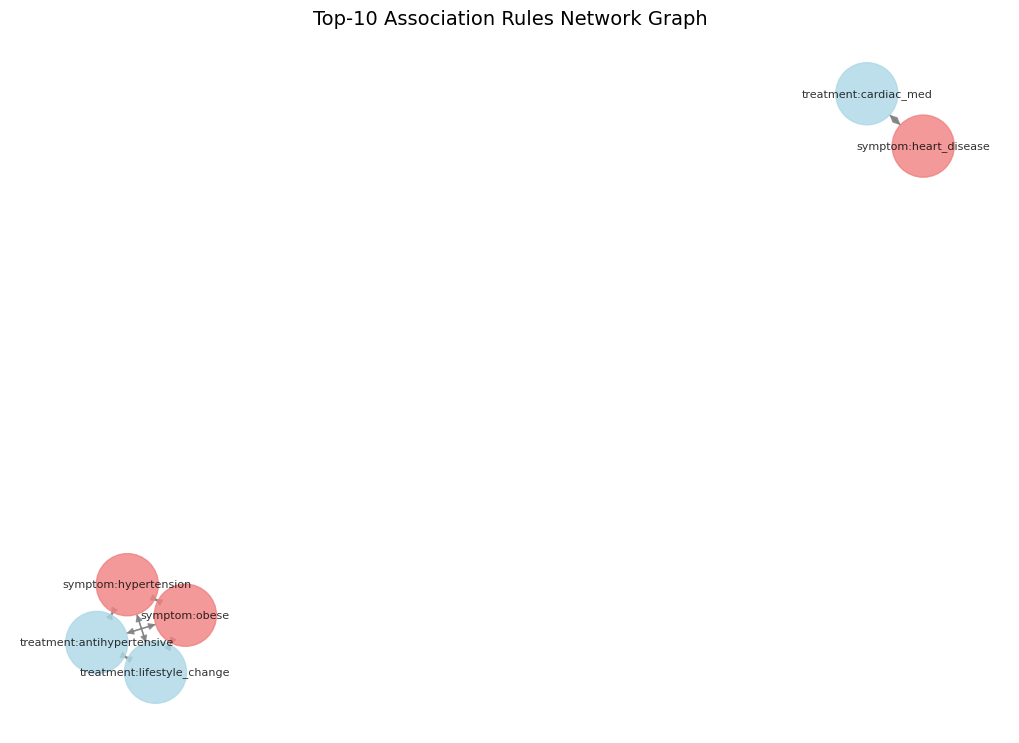

In [4]:
%pip install networkx
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for a in row["antecedents"]:
        for c in row["consequents"]:
            G.add_edge(
                a, c,
                weight=row["lift"],
                support=row["support"],
                confidence=row["confidence"]
            )

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)

# Node colors
color_map = []
for node in G.nodes():
    if node.startswith("symptom"):
        color_map.append("lightcoral")
    elif node.startswith("treatment"):
        color_map.append("lightblue")
    elif node.startswith("outcome"):
        color_map.append("lightgreen")
    else:
        color_map.append("lightgray")

nx.draw(
    G, pos,
    with_labels=True,
    node_color=color_map,
    node_size=2000,
    font_size=8,
    edge_color="gray",
    arrows=True,
    alpha=0.8
)

plt.title("Top-10 Association Rules Network Graph", fontsize=14)
plt.show()
